In [1]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/btech/nityanand.mathur/anaconda3/envs/inpainting/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


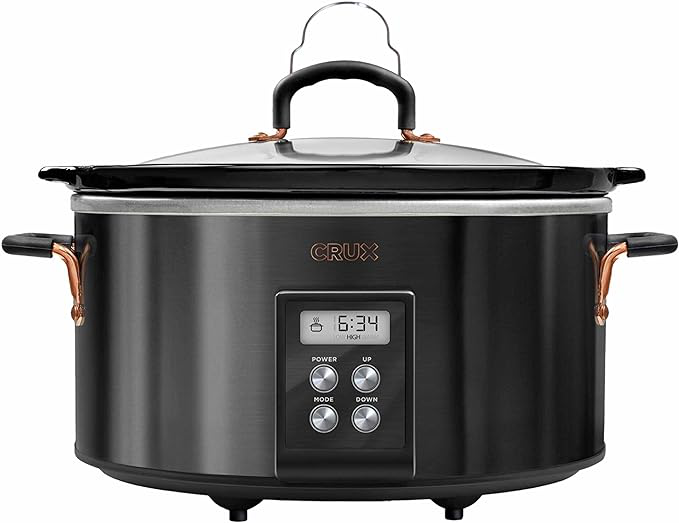

(1358, 1358)


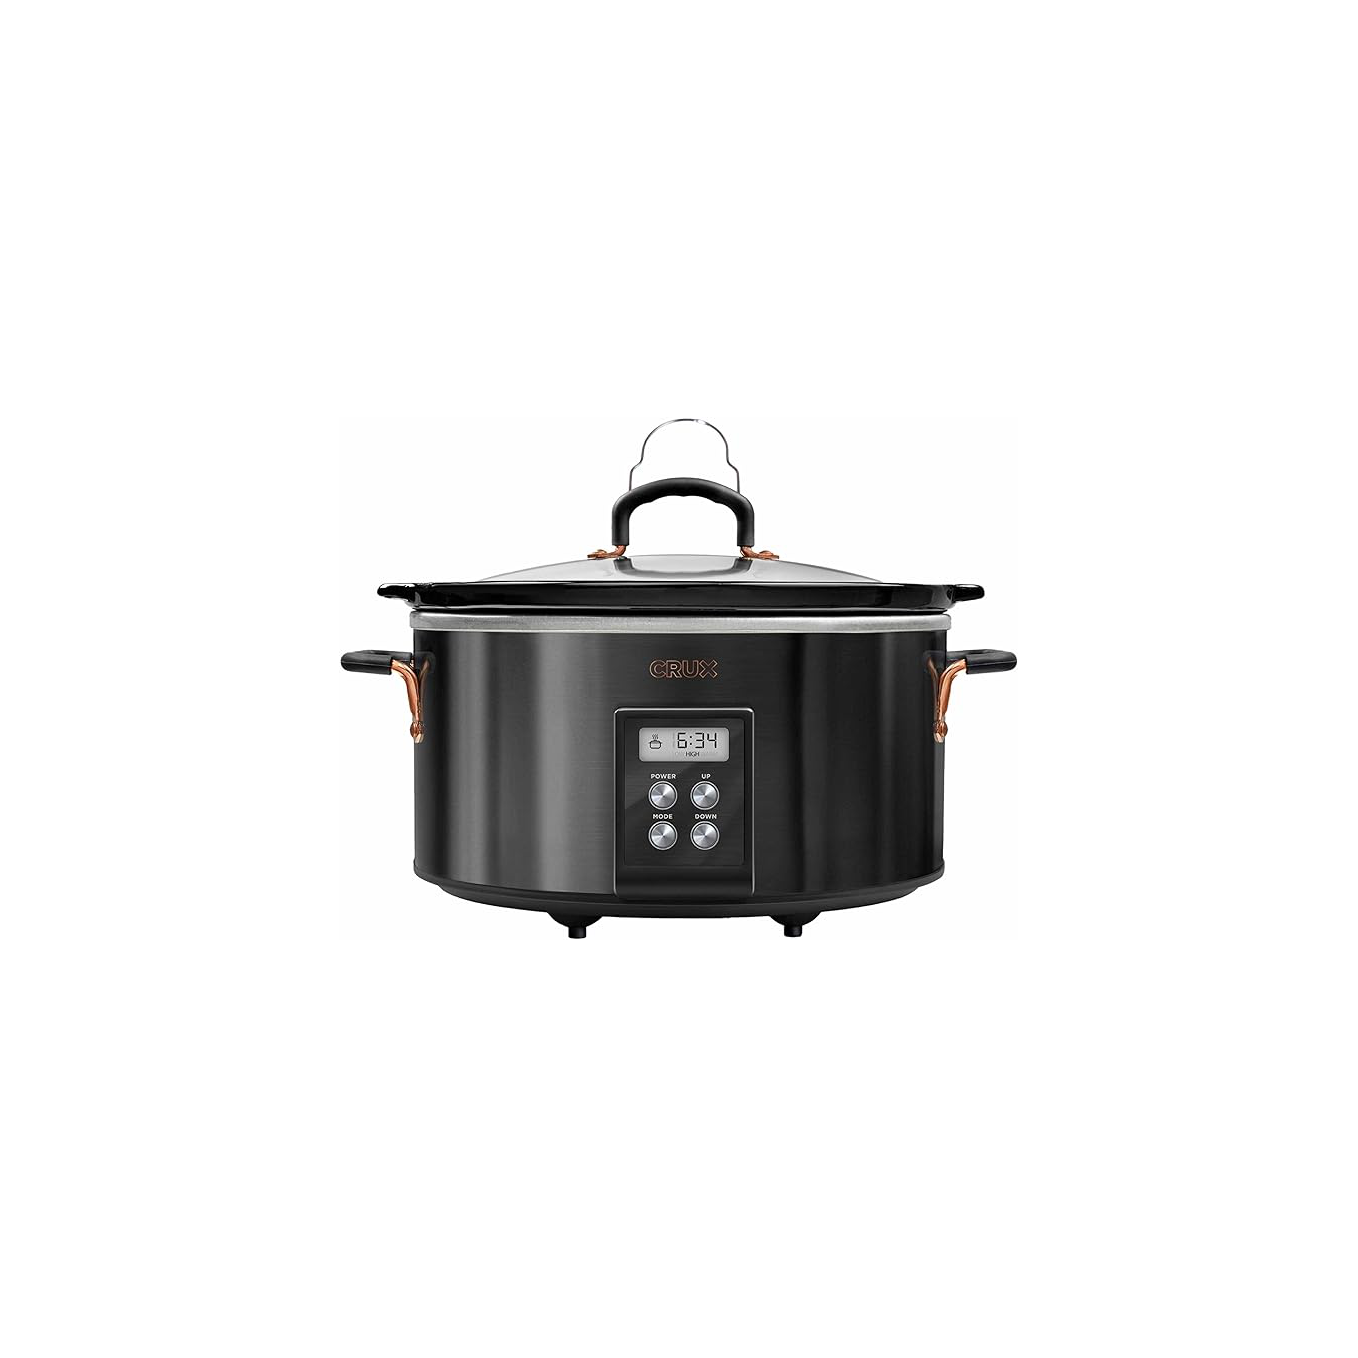

In [2]:
def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (2*max(img.size),)*2
    print(size)
    layer = Image.new('RGB', size, (255,255,255))
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

img = Image.open('../data/examples/example1.jpg')
display(img)
img = white_bg_square(img)

display(img)

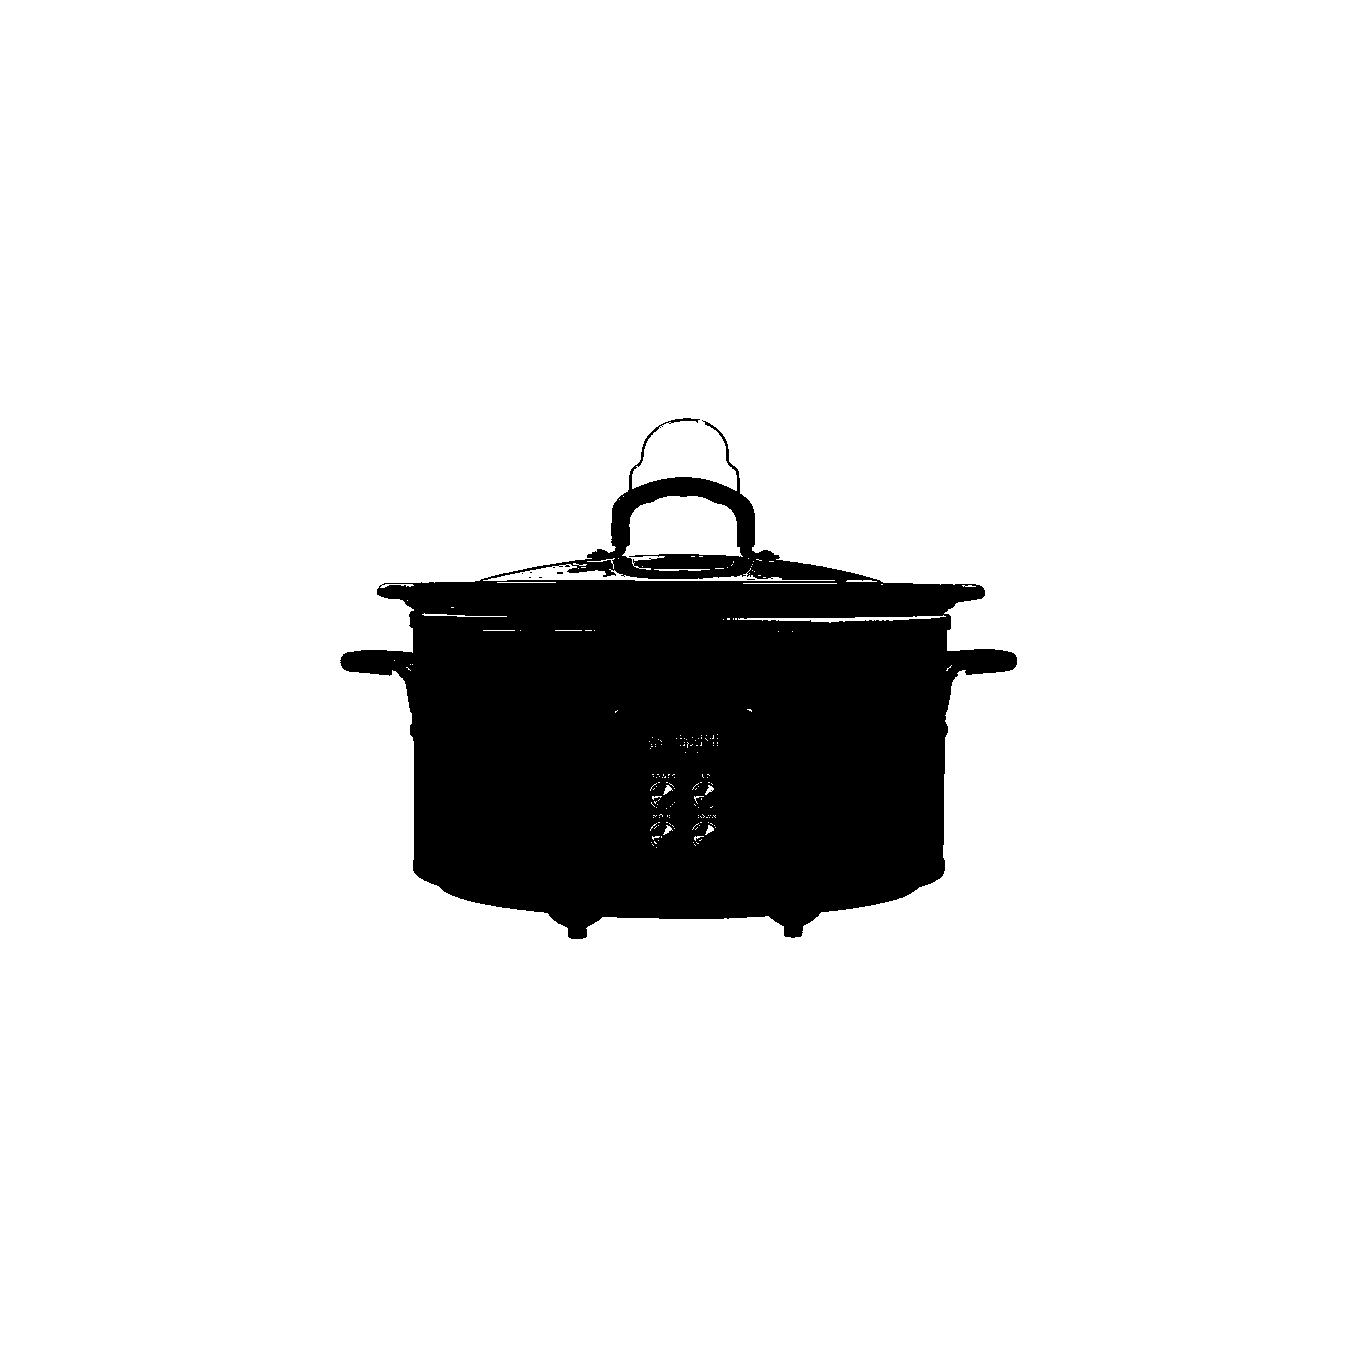

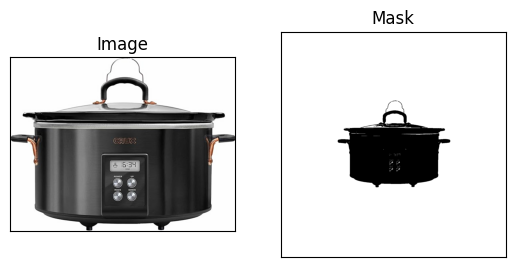

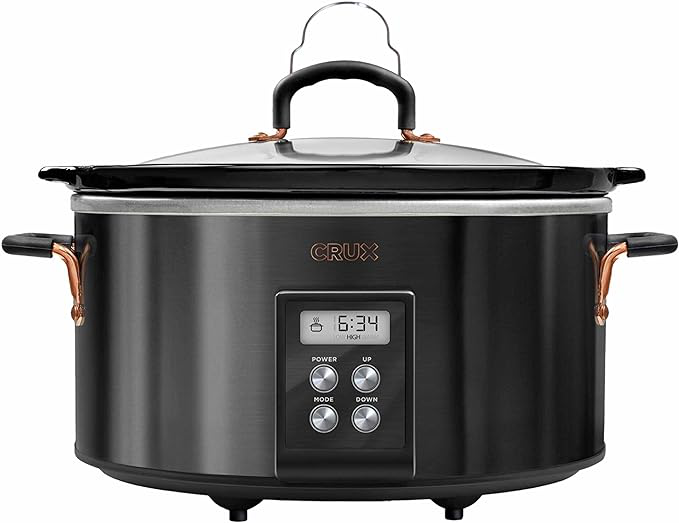

In [4]:
# pipe = StableDiffusionInpaintPipeline.from_pretrained(
#     "runwayml/stable-diffusion-inpainting",
#     torch_dtype=torch.float32
# )

# Define a white threshold
lower = np.array([220, 220, 220])
upper = np.array([255, 255, 255])

image = Image.open("/home/btech/nityanand.mathur/Inpainting/data/examples/example1.jpg")

image_cv2 = np.array(img)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2BGR)

mask = cv2.inRange(image_cv2, lower, upper)
mask = Image.fromarray(mask)
display(mask)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title("Image")
ax[0].set_xticks([])  # remove x-axis labels
ax[0].set_yticks([])  # remove y-axis labels
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Mask")
ax[1].set_xticks([])  # remove x-axis labels
ax[1].set_yticks([])  # remove y-axis labels
# plt.savefig("combined.png")
plt.show()

prompt = "product on a center table on a kitchen counter"

# image = pipe(prompt=prompt, image=image, mask_image=mask, torch_device="cuda").images[0]
display(image)
# image.save("./yellow_cat_on_park_bench.png")
